<a href="https://colab.research.google.com/github/yechan9601/python_digital_marketing/blob/main/ch8_PredictingEngagement_21801073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [ ]:
df.shape

(9134, 24)

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

# 2. Variable Encoding

## 2.1. Response Variable: Response

In [ ]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df['Engaged'].mean()  # 응답률 평균

0.14320122618786948

100명중 14명 응답률

## 2.2. Features

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


수치형 feature와 범주형 feature 나누기.

In [ ]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 
    'Number of Policies', 'Total Claim Amount'
]

## - Creating Dummy Variables

In [ ]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
  encoded_df = pd.get_dummies(df[col]) # 범주형 데이터를 수치화할 때, 관계성을 없애주기 위함
  encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns] # Attribute 이름에 범주형 변수이름을 append

  categorical_features += list(encoded_df.columns) # 리스트에 해당 변수명들을 넣어주기

  df = pd.concat([df, encoded_df], axis='columns') # 기존 데이터프레임에 인코딩된(get_dummies) 데이터프레임을 붙여주기

train과 test set의 accuracy, recall, precision이 왜 차이가 나는지 답할 것.

In [ ]:
encoded_df # for 반복문을 사용했으므로, columns_to_encode의 마지막 Attribute인 'Coverage' 범주형 데이터만 남아있는 것을 볼 수 있다.

,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
9129,1,0,0
9130,0,1,0
9131,0,1,0
9132,0,1,0


In [ ]:
categorical_features

['Sales.Channel.Agent',
 'Sales.Channel.Branch',
 'Sales.Channel.Call Center',
 'Sales.Channel.Web',
 'Vehicle.Size.Large',
 'Vehicle.Size.Medsize',
 'Vehicle.Size.Small',
 'Vehicle.Class.Four-Door Car',
 'Vehicle.Class.Luxury Car',
 'Vehicle.Class.Luxury SUV',
 'Vehicle.Class.SUV',
 'Vehicle.Class.Sports Car',
 'Vehicle.Class.Two-Door Car',
 'Policy.Corporate L1',
 'Policy.Corporate L2',
 'Policy.Corporate L3',
 'Policy.Personal L1',
 'Policy.Personal L2',
 'Policy.Personal L3',
 'Policy.Special L1',
 'Policy.Special L2',
 'Policy.Special L3',
 'Policy.Type.Corporate Auto',
 'Policy.Type.Personal Auto',
 'Policy.Type.Special Auto',
 'EmploymentStatus.Disabled',
 'EmploymentStatus.Employed',
 'EmploymentStatus.Medical Leave',
 'EmploymentStatus.Retired',
 'EmploymentStatus.Unemployed',
 'Marital.Status.Divorced',
 'Marital.Status.Married',
 'Marital.Status.Single',
 'Education.Bachelor',
 'Education.College',
 'Education.Doctor',
 'Education.High School or Below',
 'Education.Master',


In [ ]:
df # 데이터프레임에 인코딩된 범주형 특성명들이 추가된 것을 볼 수 있다

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,0,1,0,0,0,0,1,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,1,1,0,0,0,0,0,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,1,0,1,0,0,0,0,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,1,0,1,0,0,0,0,1,0,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,1,0,1,0,0,0,0,1,0,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,0,0,1,0,0,0,0,1,0
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,0,1,1,0,0,0,0,0,1,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,1,0,0,1,0,0,0,0,1,0


## - Encoding Gender

In [ ]:
# 범주형 특성인 성별 또한 M/F => 0/1로 수치화
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')

## - all features & response

In [ ]:
# 모든 특성명을 저장해두기. (범주형 + 수치형)
all_features = continuous_features + categorical_features
response = 'Engaged'

In [ ]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns] # replace space with dot(.)
all_features = [x.replace(' ', '.') for x in all_features]

In [ ]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Agent,...,Education.Master,Education.Master,Coverage.Basic,Coverage.Basic,Coverage.Extended,Coverage.Extended,Coverage.Premium,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,1,...,0,0,1,1,0,0,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,1,...,0,0,0,0,1,1,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,1,...,0,0,0,0,0,0,1,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
sample_df.columns

Index(['Customer.Lifetime.Value', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Total.Claim.Amount',
       'Sales.Channel.Agent', 'Sales.Channel.Agent', 'Sales.Channel.Branch',
       'Sales.Channel.Branch', 'Sales.Channel.Call.Center',
       'Sales.Channel.Call.Center', 'Sales.Channel.Web', 'Sales.Channel.Web',
       'Vehicle.Size.Large', 'Vehicle.Size.Large', 'Vehicle.Size.Medsize',
       'Vehicle.Size.Medsize', 'Vehicle.Size.Small', 'Vehicle.Size.Small',
       'Vehicle.Class.Four-Door.Car', 'Vehicle.Class.Four-Door.Car',
       'Vehicle.Class.Luxury.Car', 'Vehicle.Class.Luxury.Car',
       'Vehicle.Class.Luxury.SUV', 'Vehicle.Class.Luxury.SUV',
       'Vehicle.Class.SUV', 'Vehicle.Class.SUV', 'Vehicle.Class.Sports.Car',
       'Vehicle.Class.Sports.Car', 'Vehicle.Class.Two-Door.Car',
       'Vehicle.Class.Two-Door.Car', 'Policy.Corporate.L1',
       'Policy.Corporat

In [ ]:
all_features

['Customer.Lifetime.Value',
 'Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Sales.Channel.Agent',
 'Sales.Channel.Branch',
 'Sales.Channel.Call.Center',
 'Sales.Channel.Web',
 'Vehicle.Size.Large',
 'Vehicle.Size.Medsize',
 'Vehicle.Size.Small',
 'Vehicle.Class.Four-Door.Car',
 'Vehicle.Class.Luxury.Car',
 'Vehicle.Class.Luxury.SUV',
 'Vehicle.Class.SUV',
 'Vehicle.Class.Sports.Car',
 'Vehicle.Class.Two-Door.Car',
 'Policy.Corporate.L1',
 'Policy.Corporate.L2',
 'Policy.Corporate.L3',
 'Policy.Personal.L1',
 'Policy.Personal.L2',
 'Policy.Personal.L3',
 'Policy.Special.L1',
 'Policy.Special.L2',
 'Policy.Special.L3',
 'Policy.Type.Corporate.Auto',
 'Policy.Type.Personal.Auto',
 'Policy.Type.Special.Auto',
 'EmploymentStatus.Disabled',
 'EmploymentStatus.Employed',
 'EmploymentStatus.Medical.Leave',
 'EmploymentStatus.Retired',
 'EmploymentStatus.Unemployed',
 

# 3. Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

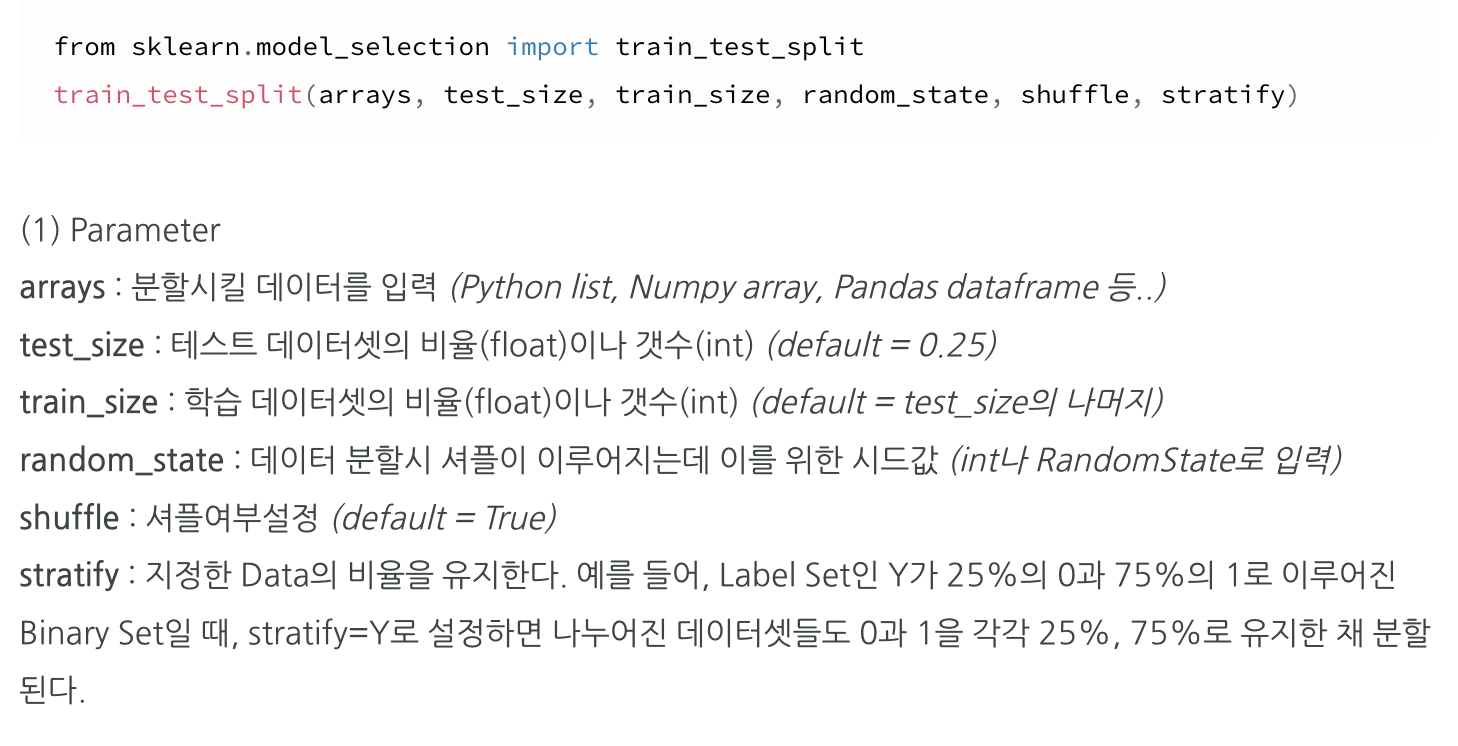

[sklearn-train_test_split출처](https://blog.naver.com/PostView.naver?blogId=siniphia&logNo=221396370872)

In [ ]:
sample_df.shape

(9134, 92)

In [ ]:
x_train.shape

(6393, 91)

In [ ]:
y_train.shape

(6393,)

In [ ]:
x_test.shape

(2741, 91)

In [ ]:
y_test.shape

(2741,)

## - 3.1. Building RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

feature selection:
https://hongl.tistory.com/129

hyperparameters you can define in RandomForestClassifier
- n_estimator:
- max_depth
- min_sample_split
- max_features

In [ ]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

## - Individual Trees

In [ ]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1532627648),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1964516141),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=631000320),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1945024969),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1757686980),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=478394640),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1986577397),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=34822082),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=130085305),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=420840888),
 DecisionTreeClassifier(max_depth=5, max_featu

In [ ]:
len(rf_model.estimators_)

200

In [ ]:
rf_model.estimators_[150]

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=304928190)

In [ ]:
rf_model.estimators_[100].predict(x_test)[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
rf_model.estimators_[1].predict(x_test)[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
rf_model.estimators_[2].predict(x_test)[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
rf_model.estimators_[3].predict(x_test)[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
rf_model.estimators_[4].predict(x_test)[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## - Feature Importances

In [ ]:
rf_model.feature_importances_

array([4.11444772e-02, 5.62210900e-02, 4.16862483e-02, 2.32038780e-02,
       3.14756073e-02, 8.24915571e-03, 1.37214041e-02, 5.46730115e-02,
       2.99172624e-02, 2.39514788e-02, 3.85448374e-03, 4.08314789e-03,
       4.43371265e-03, 4.27462622e-03, 2.54952332e-03, 1.95925974e-03,
       3.35611221e-03, 3.83183791e-03, 5.26404537e-03, 4.98671907e-03,
       5.10580438e-03, 5.64119513e-03, 1.97763360e-03, 2.46684263e-03,
       4.22892981e-04, 7.08242685e-04, 1.59325329e-03, 2.26875285e-03,
       3.43995185e-03, 3.13122730e-03, 1.88182973e-03, 2.10721552e-03,
       2.69782307e-03, 2.70320108e-03, 6.77663131e-04, 4.98377758e-04,
       7.61844156e-04, 5.07998858e-04, 8.99546858e-04, 4.68422784e-04,
       1.01259524e-03, 6.82750993e-04, 7.09575165e-04, 2.95766570e-04,
       8.85989124e-04, 7.24259342e-04, 8.09446931e-04, 9.68161991e-04,
       3.63893469e-04, 3.29452406e-04, 1.51072585e-03, 1.53079799e-03,
       1.60753404e-04, 4.03804080e-04, 4.26355666e-04, 7.97709568e-04,
      

In [ ]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
1,0.056221,Income
7,0.054673,Total.Claim.Amount
2,0.041686,Monthly.Premium.Auto
0,0.041144,Customer.Lifetime.Value
4,0.031476,Months.Since.Policy.Inception
8,0.029917,Sales.Channel.Agent
9,0.023951,Sales.Channel.Branch
3,0.023204,Months.Since.Last.Claim
6,0.013721,Number.of.Policies
5,0.008249,Number.of.Open.Complaints


# 3.2. Evaluating Models

## - Accuracy, Precision, and Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [ ]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8763
Out-of-Sample Accuracy: 0.8771


In [ ]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.8963
Out-of-Sample Precision: 0.8906


In [ ]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1596
Out-of-Sample Recall: 0.1473


## assignment

accuracy, precision, recall이 train data set, test data set에 따라 달라지는데 그 이유가 무엇인지 설명하라. 특히 Accuracy는 큰 차이가 없는데,Precision에서는 3%의 차이를 보이고, Recall에서는 그보다 작은 1%의 차이를 보이는 이유를 설명하라.

답: 


모델 학습 시 training set 과 test set이 필요하다. training set은 모델을 학습하는데 사용되며, test set은 해당 모델의 예상되는 성능을 측정하기 위해 사용된다. 여기서 validation set, 즉 검정 데이터 또한 필요하게 되는데, 이 또한 training set으로 만들어진 모델의 성능을 측정하기 위해 사용된다. 다만 validation set과 test set의 차이는, validation set에서는 여러 모델에 반복적으로 사용되었고, 그 중 운 좋게 성능이 뛰어나게 측정되거나, 운 나쁘게 성능이 안좋게 측정되어 선택되었을 가능성이 있기 때문에, 이러한 오차를 줄이기 위해 test set을 마지막으로 딱 한 번 모델의 예상되는 성능을 측정하기 위해 사용하는 것이다. 일반적으로 세 가지 set의 비율은 다음과 같다. 

(training set : validation set : test set = 60 : 20 : 20)

이러한 이유로, train data set, test data set에 따라 다른 score가 나타날 수 있다. 

추가적으로, 
Accuracy는 전체 대비 정확하게 예측한 개수의 비율이기 때문에 test/training set에서 큰 차이를 보이지 않는다. 그러나, 
Precision은 Positive라고 예측한 비율 중 진짜 Positive의 비율을 나타내며, 
Recall은 실제 Positive 데이터 중 Positive라고 예측한 비율을 뜻하는데, 해당 Positive 데이터와 실제 True값의 비율들이 training 밎 test set에서 비교적 상이하기 때문에 재현율과 정밀도에서의 점수가 큰 차이를 보일 수 있다. 또한, precision과 recall은 Trade-Off의 관계를 가지기 때문에, 정밀도가 높다면 재현율은 낮아지고, 반대로 재현율이 높다면 정밀도가 낮아지게 된다. 이 때문에, Precision에서는 3%라는 큰 차이가 나타나는 반면 Recall에서는 상대적으로 적은 1%의 차이를 보이는 것이다. 

## - ROC & AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [ ]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [ ]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8534
Out-Sample AUC: 0.8077


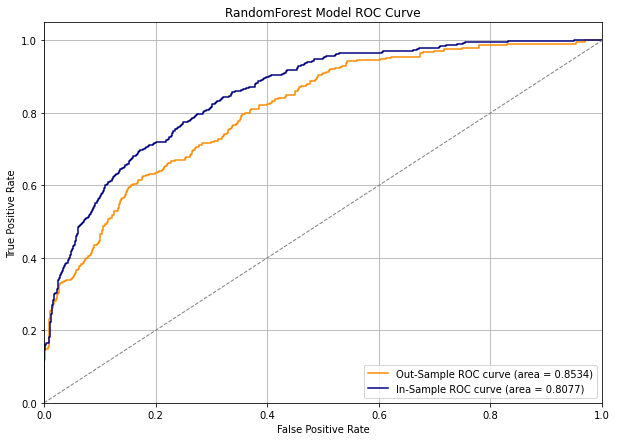

In [ ]:
plt.figure(
    figsize=(10, 7)
)

plt.plot(
    out_sample_fpr,
    out_sample_tpr,
    color='darkorange',
    label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)

plt.plot(
    in_sample_fpr,
    in_sample_tpr,
    color='navy',
    label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)

plt.plot(
    [0, 1],
    [0, 1], 
    color='gray',
    lw=1,
    linestyle='--'
)

plt.grid()
plt.xlim(
    [0.0, 1.0]
)
plt.ylim(
    [0.0, 1.05]
)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc='lower right')

plt.show()